In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, fbeta_score
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from catboost import CatBoostRegressor

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_hist_gradient_boosting
from pandas import read_csv
import IPython
from IPython.display import display
%matplotlib inline

In [2]:
df = read_csv('global_air_pollution_data.csv')
df.head()

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [3]:
df.columns

Index(['country_name', 'city_name', 'aqi_value', 'aqi_category',
       'co_aqi_value\t', 'co_aqi_category', 'ozone_aqi_value',
       'ozone_aqi_category', 'no2_aqi_value', 'no2_aqi_category',
       'pm2.5_aqi_value', 'pm2.5_aqi_category'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country_name        23036 non-null  object
 1   city_name           23462 non-null  object
 2   aqi_value           23463 non-null  int64 
 3   aqi_category        23463 non-null  object
 4   co_aqi_value	       23463 non-null  int64 
 5   co_aqi_category     23463 non-null  object
 6   ozone_aqi_value     23463 non-null  int64 
 7   ozone_aqi_category  23463 non-null  object
 8   no2_aqi_value       23463 non-null  int64 
 9   no2_aqi_category    23463 non-null  object
 10  pm2.5_aqi_value     23463 non-null  int64 
 11  pm2.5_aqi_category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [5]:
df.isna().sum()

country_name          427
city_name               1
aqi_value               0
aqi_category            0
co_aqi_value\t          0
co_aqi_category         0
ozone_aqi_value         0
ozone_aqi_category      0
no2_aqi_value           0
no2_aqi_category        0
pm2.5_aqi_value         0
pm2.5_aqi_category      0
dtype: int64

In [6]:
df.dtypes

country_name          object
city_name             object
aqi_value              int64
aqi_category          object
co_aqi_value\t         int64
co_aqi_category       object
ozone_aqi_value        int64
ozone_aqi_category    object
no2_aqi_value          int64
no2_aqi_category      object
pm2.5_aqi_value        int64
pm2.5_aqi_category    object
dtype: object

In [7]:
df['country_name'].value_counts()

country_name
United States of America    2872
India                       2488
Brazil                      1562
Germany                     1345
Russian Federation          1241
                            ... 
Vanuatu                        1
Solomon Islands                1
Republic of Korea              1
Saint Lucia                    1
Monaco                         1
Name: count, Length: 175, dtype: int64

In [8]:
df['aqi_category'].value_counts()

aqi_category
Good                              9936
Moderate                          9231
Unhealthy                         2227
Unhealthy for Sensitive Groups    1591
Very Unhealthy                     287
Hazardous                          191
Name: count, dtype: int64

<Axes: xlabel='aqi_category', ylabel='Count'>

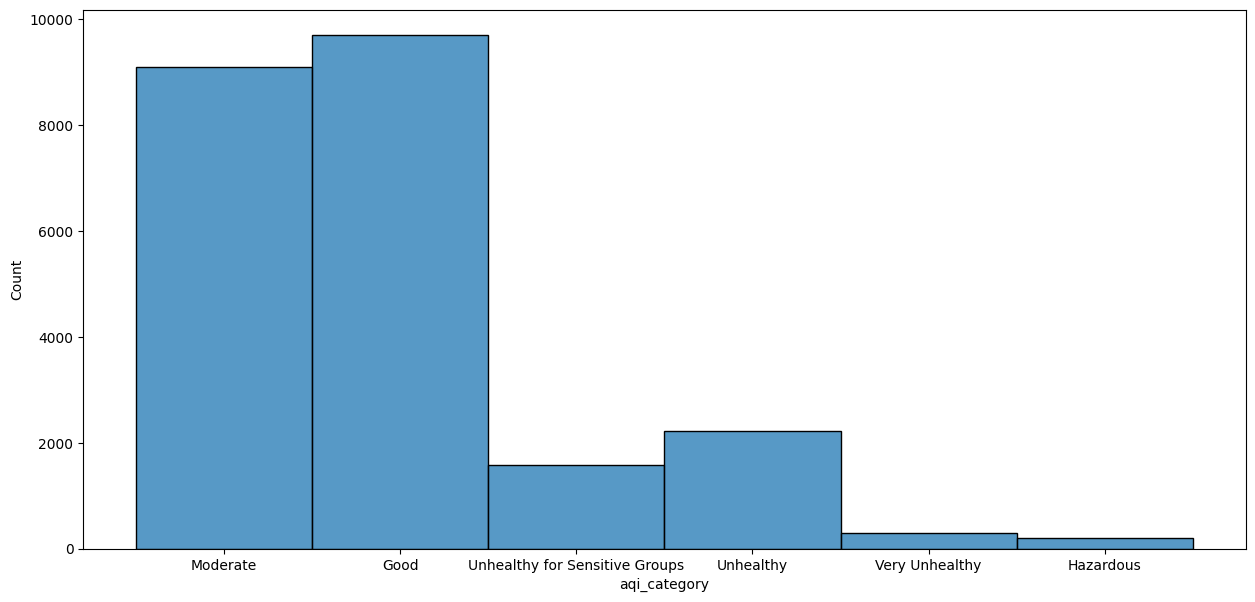

In [32]:
# Distribution of Air Quality categories across the dataset
plt.figure(figsize=(15,7))
sns.histplot(df['aqi_category'], bins=10)

<Axes: xlabel='co_aqi_category', ylabel='Count'>

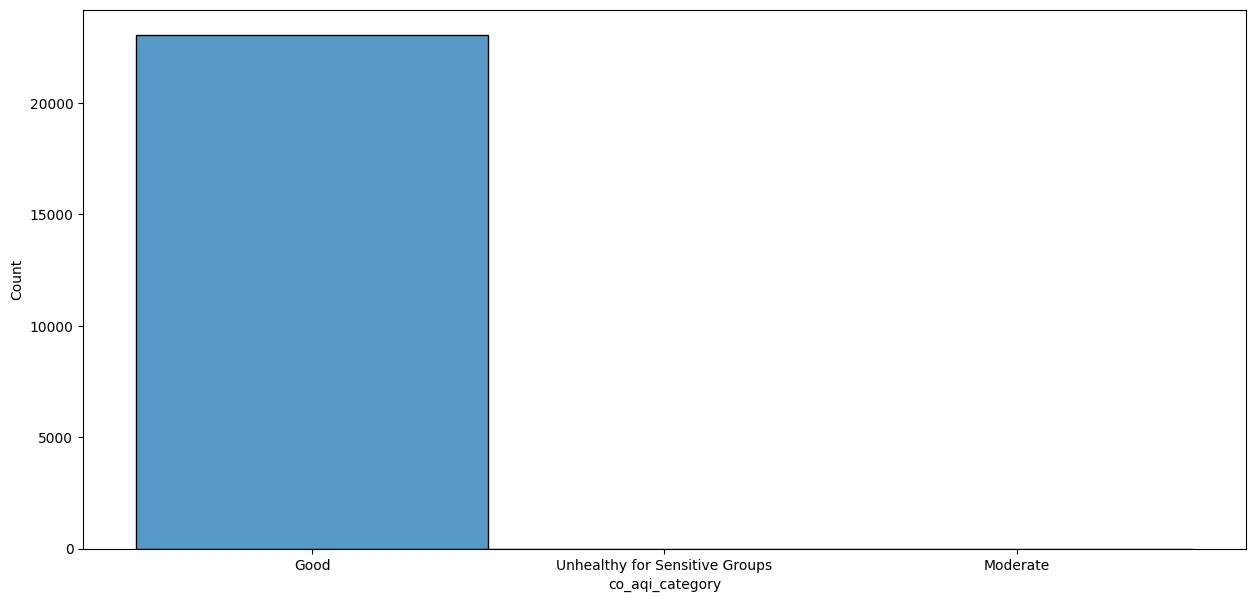

In [34]:
# distribution of CO2 Categories
plt.figure(figsize=(15,7))
sns.histplot(df['co_aqi_category'])

<Axes: xlabel='no2_aqi_category', ylabel='Count'>

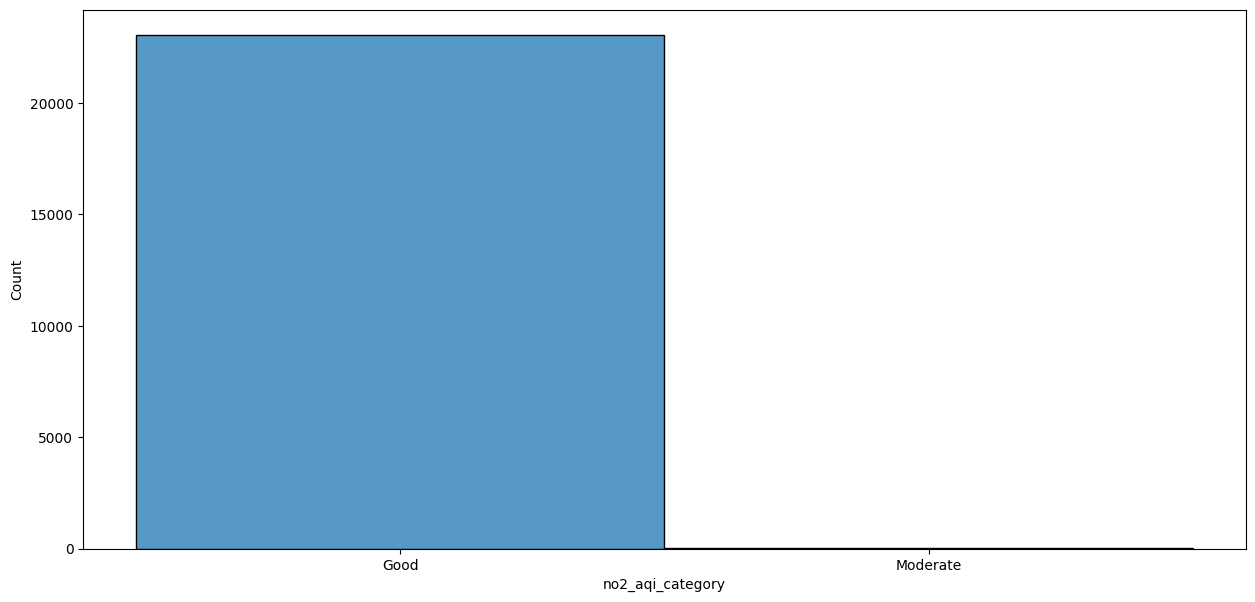

In [35]:
# distribution of Nitrogen Category
plt.figure(figsize=(15,7))
sns.histplot(df['no2_aqi_category'])

<Axes: xlabel='ozone_aqi_category', ylabel='Count'>

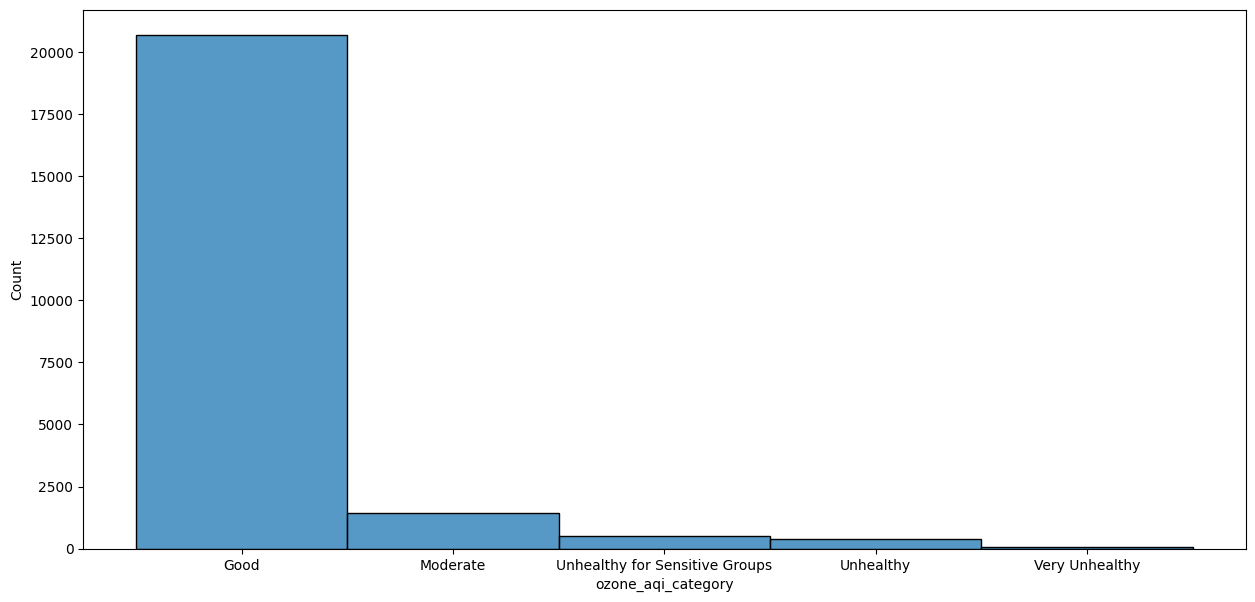

In [36]:
# distribution of Ozone Categories
plt.figure(figsize=(15,7))
sns.histplot(df['ozone_aqi_category'])

<Axes: xlabel='pm2.5_aqi_category', ylabel='Count'>

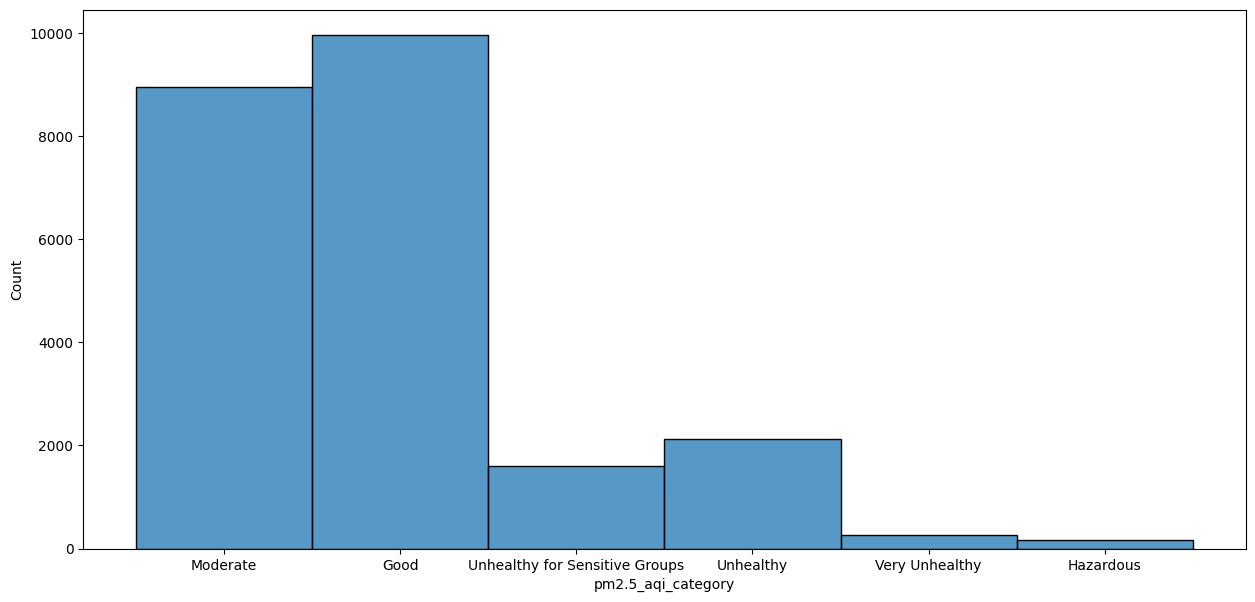

In [37]:
# distribution of PM 2.5 Categories
plt.figure(figsize=(15,7))
sns.histplot(df['pm2.5_aqi_category'])

# Removing Missing Values

In [9]:
df.isna().sum()

country_name          427
city_name               1
aqi_value               0
aqi_category            0
co_aqi_value\t          0
co_aqi_category         0
ozone_aqi_value         0
ozone_aqi_category      0
no2_aqi_value           0
no2_aqi_category        0
pm2.5_aqi_value         0
pm2.5_aqi_category      0
dtype: int64

In [10]:
df.dropna(axis=0, inplace=True)
df.isna().sum()

country_name          0
city_name             0
aqi_value             0
aqi_category          0
co_aqi_value\t        0
co_aqi_category       0
ozone_aqi_value       0
ozone_aqi_category    0
no2_aqi_value         0
no2_aqi_category      0
pm2.5_aqi_value       0
pm2.5_aqi_category    0
dtype: int64

## REMOVING CATEGORICAL COLUMNS AND CONVERT THEM TO NUMBERS

In [27]:
col = [column for column in df.columns if df[column].dtypes not in ['float64', 'int64']]
col

['country_name',
 'city_name',
 'aqi_category',
 'co_aqi_category',
 'ozone_aqi_category',
 'no2_aqi_category',
 'pm2.5_aqi_category']

In [28]:
df.country_name.value_counts()

country_name
United States of America    2872
India                       2488
Brazil                      1562
Germany                     1345
Russian Federation          1241
                            ... 
Vanuatu                        1
Solomon Islands                1
Republic of Korea              1
Saint Lucia                    1
Monaco                         1
Name: count, Length: 175, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()


In [38]:
cat = df.select_dtypes('object')
cat

,country_name,city_name,aqi_category,co_aqi_category,ozone_aqi_category,no2_aqi_category,pm2.5_aqi_category
0,Russian Federation,Praskoveya,Moderate,Good,Good,Good,Moderate
1,Brazil,Presidente Dutra,Good,Good,Good,Good,Good
2,Italy,Priolo Gargallo,Moderate,Good,Good,Good,Moderate
3,Poland,Przasnysz,Good,Good,Good,Good,Good
4,France,Punaauia,Good,Good,Good,Good,Good
...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,Unhealthy,Good,Unhealthy,Good,Unhealthy
23459,France,Sceaux,Good,Good,Good,Good,Good
23460,India,Mormugao,Good,Good,Good,Good,Good
23461,United States of America,Westerville,Moderate,Good,Good,Good,Moderate


In [40]:
df = pd.get_dummies(df, columns=col)
df.head()

,aqi_value,co_aqi_value\t,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value,country_name_Afghanistan,country_name_Albania,country_name_Algeria,country_name_Andorra,country_name_Angola,...,ozone_aqi_category_Unhealthy for Sensitive Groups,ozone_aqi_category_Very Unhealthy,no2_aqi_category_Good,no2_aqi_category_Moderate,pm2.5_aqi_category_Good,pm2.5_aqi_category_Hazardous,pm2.5_aqi_category_Moderate,pm2.5_aqi_category_Unhealthy,pm2.5_aqi_category_Unhealthy for Sensitive Groups,pm2.5_aqi_category_Very Unhealthy
0,51,1,36,0,51,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
1,41,1,5,1,41,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
2,66,1,39,2,66,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
3,34,1,34,0,20,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
4,22,0,22,0,6,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [42]:
df.dtypes

aqi_value                                            int64
co_aqi_value\t                                       int64
ozone_aqi_value                                      int64
no2_aqi_value                                        int64
pm2.5_aqi_value                                      int64
                                                     ...  
pm2.5_aqi_category_Hazardous                          bool
pm2.5_aqi_category_Moderate                           bool
pm2.5_aqi_category_Unhealthy                          bool
pm2.5_aqi_category_Unhealthy for Sensitive Groups     bool
pm2.5_aqi_category_Very Unhealthy                     bool
Length: 23237, dtype: object

In [43]:
df = df[df.select_dtypes('bool')].astype(int63)

In [7]:
df['CO_level']

0       Very High
1       Very High
2       Very High
3       Very High
4       Very High
          ...    
9352     Very low
9353     Very low
9354     Very low
9355     Very low
9356     Very low
Name: CO_level, Length: 9357, dtype: object

In [8]:
df['CO_level'].value_counts()

CO_level
High         5801
Very low     1683
Low          1556
Moderate      305
Very High      12
Name: count, dtype: int64

In [9]:
df.replace({'CO_level':{'Very low': 0, 'Low': 1, 'Moderate': 2, 'High': 3, 'Very High': 4}}, inplace=True)
df.head()

,Date,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,4
1,11/23/2004,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,4
2,11/17/2004,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,4
3,11/23/2004,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,4
4,11/26/2004,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,4


In [10]:
df.dtypes

Date             object
CO_GT           float64
PT08_S1_CO        int64
NMHC_GT           int64
C6H6_GT         float64
PT08_S2_NMHC      int64
Nox_GT            int64
PT08_S3_Nox       int64
NO2_GT            int64
PT08_S4_NO2       int64
PT08_S5_O3        int64
T               float64
RH              float64
AH              float64
CO_level          int64
dtype: object

In [11]:
df['CO_level'] = df['CO_level'].astype(float)

In [12]:
#df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [13]:
#df['Date'] = df['Date'].astype(int) // 10**9  # Convert nanoseconds to seconds

# Now, you can convert Unix timestamps to floats if needed
#df['Date'] = df['Date'].astype(float)

In [14]:
df.drop(['Date'], axis=1, inplace=True)

In [15]:
#df['Date'] = df['Date'].astype(float)

In [16]:
df.dtypes

CO_GT           float64
PT08_S1_CO        int64
NMHC_GT           int64
C6H6_GT         float64
PT08_S2_NMHC      int64
Nox_GT            int64
PT08_S3_Nox       int64
NO2_GT            int64
PT08_S4_NO2       int64
PT08_S5_O3        int64
T               float64
RH              float64
AH              float64
CO_level        float64
dtype: object

In [17]:
df.corr()['CO_level']

CO_GT           0.806972
PT08_S1_CO      0.202281
NMHC_GT         0.157228
C6H6_GT        -0.006655
PT08_S2_NMHC    0.250478
Nox_GT          0.627592
PT08_S3_Nox    -0.340432
NO2_GT          0.691575
PT08_S4_NO2     0.068043
PT08_S5_O3      0.295170
T              -0.074737
RH             -0.080428
AH             -0.067333
CO_level        1.000000
Name: CO_level, dtype: float64

In [18]:
cor = df.corr()
cor_feature = cor['CO_level'].sort_values(ascending = False).to_frame()
cor_feature.style.background_gradient(cmap='BrBG_r')

,CO_level
CO_level,1.000000
CO_GT,0.806972
NO2_GT,0.691575
Nox_GT,0.627592
PT08_S5_O3,0.295170
PT08_S2_NMHC,0.250478
PT08_S1_CO,0.202281
NMHC_GT,0.157228
PT08_S4_NO2,0.068043
C6H6_GT,-0.006655


<Axes: xlabel='CO_level', ylabel='Count'>

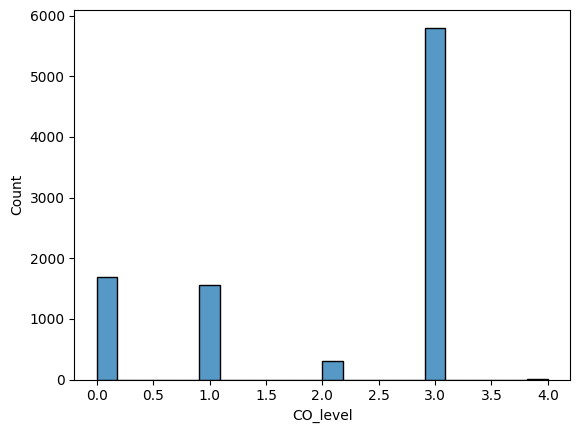

In [19]:
sns.histplot(df['CO_level'])

<Axes: ylabel='Density'>

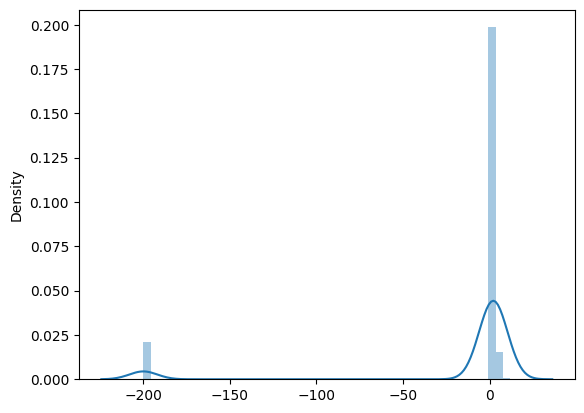

In [20]:
sns.distplot(df[['CO_level', 'CO_GT']])

In [21]:
df.corr().style.background_gradient(cmap='GnBu')

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
CO_GT,1.000000,0.041411,0.128351,-0.031378,0.029926,0.526451,-0.089981,0.671127,-0.073724,0.080310,-0.068939,-0.048227,-0.045892,0.806972
PT08_S1_CO,0.041411,1.000000,0.170007,0.852687,0.933102,0.277993,0.087019,0.154030,0.845149,0.892434,0.754844,0.745375,0.764903,0.202281
NMHC_GT,0.128351,0.170007,1.000000,0.037323,0.110104,-0.004427,0.048821,0.103307,0.162680,0.101185,-0.000009,0.008284,0.012500,0.157228
C6H6_GT,-0.031378,0.852687,0.037323,1.000000,0.767433,-0.001174,0.512193,-0.010992,0.774673,0.641334,0.971375,0.925062,0.984555,-0.006655
PT08_S2_NMHC,0.029926,0.933102,0.110104,0.767433,1.000000,0.331272,-0.073667,0.176488,0.874782,0.909905,0.669025,0.585803,0.646572,0.250478
Nox_GT,0.526451,0.277993,-0.004427,-0.001174,0.331272,1.000000,-0.436084,0.817139,0.035546,0.461889,-0.138452,-0.053009,-0.095847,0.627592
PT08_S3_Nox,-0.089981,0.087019,0.048821,0.512193,-0.073667,-0.436084,1.000000,-0.256232,0.122734,-0.208865,0.588111,0.573549,0.621618,-0.340432
NO2_GT,0.671127,0.154030,0.103307,-0.010992,0.176488,0.817139,-0.256232,1.000000,-0.022174,0.253439,-0.084104,-0.081305,-0.060440,0.691575
PT08_S4_NO2,-0.073724,0.845149,0.162680,0.774673,0.874782,0.035546,0.122734,-0.022174,1.000000,0.723690,0.755060,0.640707,0.691913,0.068043
PT08_S5_O3,0.080310,0.892434,0.101185,0.641334,0.909905,0.461889,-0.208865,0.253439,0.723690,1.000000,0.503700,0.524955,0.519467,0.295170


In [22]:
X = df.drop(['CO_level'], axis=1)

X.head()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741
1,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324
2,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244
3,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936
4,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979


In [23]:
y = df['CO_level']
y.head()

0    4.0
1    4.0
2    4.0
3    4.0
4    4.0
Name: CO_level, dtype: float64

In [24]:
columns=X.columns
X=StandardScaler().fit_transform(X)
X=pd.DataFrame(data = X,columns = columns)
X.head()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,0.593763,2.907720,-0.29267,1.177783,3.170778,4.740822,-1.459704,1.275084,2.505474,2.991654,0.060686,0.687605,0.202996
1,0.588612,2.634840,-0.29267,1.148782,3.106510,4.620397,-1.428646,1.038740,2.323533,2.761851,0.039853,0.716895,0.201927
2,0.571871,2.283128,-0.29267,1.107698,3.007186,2.250729,-1.363424,1.054497,1.805538,3.232400,0.090777,0.259983,0.196590
3,0.571871,2.828888,-0.29267,1.151199,3.109431,4.663128,-1.469021,1.330231,2.449822,3.087952,0.079203,0.646601,0.203497
4,0.570583,2.750056,-0.29267,1.047279,2.869885,4.740822,-1.391376,1.550819,2.026007,3.260852,0.132443,0.455244,0.203607


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=123)

Feature Transformation
Feature transformation is a mathematical transformation in which we apply a mathematical formula to data and transform 
the values which are useful for our further analysis.

In [26]:
polynomialfeatures=PolynomialFeatures()
X_train=polynomialfeatures.fit_transform(X_train)
X_test=polynomialfeatures.transform(X_test)

# Model(ADA BOOST)
* AdaBoost is one of the initial boosting ensemble algorithms to be adapted in solving studies. 
* It helps by combine multiple 'weak classifiers' into a single 'strong classifier.' 
* The core concept of the algorithm is to fit a sequence of weak learners on repeatedly modified versions of the data. 
* The predictions from all the Weak learners are then combined through a weighted majority vote or sum to produce the outcome/Prediction.

In [27]:
# Model Initialization
model=AdaBoostRegressor()
model.fit(X_train,Y_train)

AdaBoostRegressor()

In [28]:
# Metrics
y_pred=model.predict(X_test)
print(f" ======== ADABOOST BOOSTING REGRESSOR =======")
print(f"Acuracy : {model.score(X_test,Y_test)}")
print('R2 Score: {:.2f}'.format(r2_score(Y_test,y_pred)))
print('Mean Absolute Error {:.2f}'.format(mean_absolute_error(Y_test,y_pred)))
print('Mean Squared Error {:.2f}'.format(mean_squared_error(Y_test,y_pred)))


 ======== ADABOOST BOOSTING REGRESSOR =======
Acuracy : 1.0
R2 Score: 1.00
Mean Absolute Error 0.00
Mean Squared Error 0.00


# Model (CAT BOOST)
* CatBoost is an algorithm for gradient boosting on decision trees. 
* Developed by Yandex researchers and engineers, it is the successor of the MatrixNet algorithm that is widely used within the company for ranking tasks, 
* forecasting and making recommendations

In [29]:
# Model Initialization
model2=CatBoostRegressor()
model2.fit(X_train,Y_train)

Learning rate set to 0.056273
0:	learn: 1.1615577	total: 84.6ms	remaining: 1m 24s
1:	learn: 1.0989004	total: 97.2ms	remaining: 48.5s
2:	learn: 1.0380477	total: 108ms	remaining: 35.9s
3:	learn: 0.9826612	total: 122ms	remaining: 30.4s
4:	learn: 0.9295316	total: 136ms	remaining: 27s
5:	learn: 0.8801453	total: 149ms	remaining: 24.7s
6:	learn: 0.8319401	total: 161ms	remaining: 22.8s
7:	learn: 0.7859108	total: 173ms	remaining: 21.4s
8:	learn: 0.7434004	total: 185ms	remaining: 20.3s
9:	learn: 0.7029603	total: 200ms	remaining: 19.8s
10:	learn: 0.6650498	total: 214ms	remaining: 19.2s
11:	learn: 0.6294710	total: 228ms	remaining: 18.7s
12:	learn: 0.5956381	total: 241ms	remaining: 18.3s
13:	learn: 0.5628727	total: 252ms	remaining: 17.8s
14:	learn: 0.5331088	total: 265ms	remaining: 17.4s
15:	learn: 0.5044254	total: 277ms	remaining: 17s
16:	learn: 0.4769356	total: 290ms	remaining: 16.8s
17:	learn: 0.4508028	total: 302ms	remaining: 16.5s
18:	learn: 0.4267882	total: 313ms	remaining: 16.2s
19:	learn: 0

In [30]:
# Metrics
y_pred=model2.predict(X_test)
print(f" ======== CAT BOOSTING REGRESSOR =======")
print(f"Acuracy : {model2.score(X_test,Y_test)}")
#print(f'F1 Beta Score: {fbeta_score(Y_test,y_pred)}')
print('R2 Score: {:.2f}'.format(r2_score(Y_test,y_pred)))
print('Mean Absolute Error {:.2f}'.format(mean_absolute_error(Y_test,y_pred)))
print('Mean Squared Error {:.2f}'.format(mean_squared_error(Y_test,y_pred)))


 ======== CAT BOOSTING REGRESSOR =======
Acuracy : 0.9999290563823017
R2 Score: 1.00
Mean Absolute Error 0.00
Mean Squared Error 0.00


# Model (GBOOST)
* Gradient Boosting builds an additive model in a forward stage-wise fashion;
* it allows for the optimization of arbitrary differentiable loss functions. 
* In each stage a regression tree is fit on the negative gradient of the given loss function.

In [31]:
# Model Initialization
model3=GradientBoostingRegressor()
model3.fit(X_train,Y_train)

GradientBoostingRegressor()

In [32]:
y_pred=model3.predict(X_test)
print(f" ======== GRADIENT BOOSTING REGRESSOR =======")
print(f"Acuracy : {model3.score(X_test,Y_test)}")
print('R2 Score: {:.2f}'.format(r2_score(Y_test,y_pred)))
print('Mean Absolute Error {:.2f}'.format(mean_absolute_error(Y_test,y_pred)))
print('Mean Squared Error {:.2f}'.format(mean_squared_error(Y_test,y_pred)))


 ======== GRADIENT BOOSTING REGRESSOR =======
Acuracy : 0.9999999992944595
R2 Score: 1.00
Mean Absolute Error 0.00
Mean Squared Error 0.00


# Model (LIGHT GBM)
* LightGBM is a gradient boosting framework that uses tree based learning algorithms.
* It is designed to be distributed and efficient.

In [33]:
# Model Initialization
model4=LGBMRegressor()
model4.fit(X_train,Y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006650 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26162
[LightGBM] [Info] Number of data points in the train set: 7485, number of used features: 104
[LightGBM] [Info] Start training from score 2.094856
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LGBMRegressor()

In [34]:
y_pred=model4.predict(X_test)
print(f" ======== LIGHT GBM BOOSTING REGRESSOR =======")
print(f"Acuracy : {model4.score(X_test,Y_test)}")
print('R2 Score: {:.2f}'.format(r2_score(Y_test,y_pred)))
print('Mean Absolute Error {:.2f}'.format(mean_absolute_error(Y_test,y_pred)))
print('Mean Squared Error {:.2f}'.format(mean_squared_error(Y_test,y_pred)))


 ======== LIGHT GBM BOOSTING REGRESSOR =======
Acuracy : 0.999484753972942
R2 Score: 1.00
Mean Absolute Error 0.00
Mean Squared Error 0.00


# Model (XGBOOST)
* XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.
*  It implements machine learning algorithms under the Gradient Boosting framework.
*  XGBoost provides a parallel tree boosting (also known as GBDT, GBM)

In [35]:
# Model Initialization
model5=XGBRegressor()
model5.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
# Metrics
y_pred=model5.predict(X_test)
print(f" ======== XGB REGRESSOR =======")
print(f"Acuracy : {model5.score(X_test,Y_test)}")
print('R2 Score: {:.2f}'.format(r2_score(Y_test,y_pred)))
print('Mean Absolute Error {:.2f}'.format(mean_absolute_error(Y_test,y_pred)))
print('Mean Squared Error {:.2f}'.format(mean_squared_error(Y_test,y_pred)))


 ======== XGB REGRESSOR =======
Acuracy : 0.999999999838075
R2 Score: 1.00
Mean Absolute Error 0.00
Mean Squared Error 0.00


# Model (HG BOOSTING)
* Histogram-based Gradient Boosting Regression Tree.
* This estimator is much faster than GradientBoostingRegressor for big datasets (n_samples >= 10 000).
* This estimator has native support for missing values (NaNs).

In [37]:
# Model Initialization
model6=HistGradientBoostingRegressor()
model6.fit(X_train,Y_train)

HistGradientBoostingRegressor()

In [38]:
# Metrics
y_pred=model6.predict(X_test)
print(f" ======== HIST GRADIENT BOOSTING REGRESSOR =======")
print(f"Acuracy : {model6.score(X_test,Y_test)}")
print('R2 Score: {:.2f}'.format(r2_score(Y_test,y_pred)))
print('Mean Absolute Error {:.2f}'.format(mean_absolute_error(Y_test,y_pred)))
print('Mean Squared Error {:.2f}'.format(mean_squared_error(Y_test,y_pred)))


 ======== HIST GRADIENT BOOSTING REGRESSOR =======
Acuracy : 0.999598130368872
R2 Score: 1.00
Mean Absolute Error 0.00
Mean Squared Error 0.00
